In [1]:
#Kod do wykresu ze średnim opóźnieniem dla poszczególnych typów silników

In [2]:
import pandas as pd 
import numpy as np
from util.getData import *
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = getData(["TailNum", "Cancelled", "ArrDelay"])
planes = getPlaneData()

In [4]:
# silnik, a opoznienie
df1 = (df[["TailNum", "ArrDelay"]].merge(planes[["tailnum", "engine_type"]], left_on = "TailNum", right_on = "tailnum"))[["engine_type", "ArrDelay"]]

In [5]:
df1 = df1.mask(df1.eq('None')).dropna()

In [6]:
df1["AverageDelay"] = df1.groupby("engine_type")["ArrDelay"].transform("mean")

In [7]:
df1 = df1[["engine_type", "AverageDelay"]].drop_duplicates()
df1 = df1.sort_values("AverageDelay", ascending=False)
df1

,engine_type,AverageDelay
0,Turbo-Fan,7.975412
286451,Turbo-Jet,7.790825
6354006,4 Cycle,7.337338
5021538,Reciprocating,6.967177
10025968,Turbo-Shaft,6.601205
6403100,Turbo-Prop,5.716768


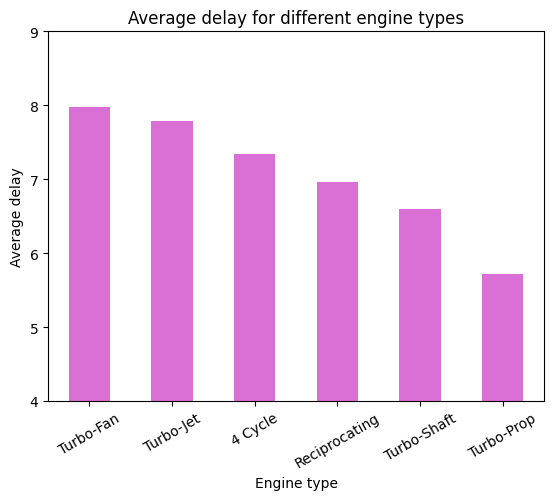

In [8]:
df1.plot(kind="bar", legend=None, color="orchid")
plt.title("Average delay for different engine types")
plt.xlabel("Engine type")
plt.ylabel("Average delay")
plt.xticks(np.arange(6), list(df1.engine_type), rotation=30)
plt.ylim(4, 8)
plt.yticks(np.arange(4, 10))
plt.show()

In [9]:
#Kod dla wykresu ze współczynnikiem odwołań lotów w zależności od modelu samolotu i typu silnika

In [10]:
# silnik i producent, a odwolanie lotów
df2 = df[["TailNum", "Cancelled"]].merge(planes[["tailnum", "manufacturer", "engine_type"]], left_on="TailNum", right_on="tailnum")[["Cancelled", "manufacturer", "engine_type"]]

In [11]:
df3 = df2.query("Cancelled == 1")
df3["NCancelled"] = df3.groupby(["manufacturer", "engine_type"])["manufacturer"].transform("count")
df2["flights"] = df2.groupby(["manufacturer", "engine_type"])["manufacturer"].transform("count")
df2 = df2.drop_duplicates()
df3 = df3.drop_duplicates()
df3 = df3.drop("Cancelled", axis= 1)
df2 = df2.drop("Cancelled", axis= 1)

In [17]:
df4 = df2.merge(df3, on=["manufacturer", "engine_type"]).drop_duplicates().dropna()
df4 = df4.query("flights >= 1000")
df4["CancellationRatio"] = (df4.NCancelled / df4.flights) * 100
df4 = df4.drop(["flights", "NCancelled"], axis= 1)
df4 = df4.sort_values("CancellationRatio", ascending=False).head(10)
df4

,manufacturer,engine_type,CancellationRatio
44,DEHAVILLAND,Turbo-Prop,4.461500
40,AEROSPATIALE/ALENIA,Turbo-Prop,4.237534
42,AEROSPATIALE,Turbo-Prop,4.162571
16,DOUGLAS,Turbo-Jet,2.496736
18,MCDONNELL DOUGLAS,Turbo-Jet,2.212569
20,MCDONNELL DOUGLAS CORPORATION,Turbo-Jet,2.163376
22,MCDONNELL DOUGLAS AIRCRAFT CO,Turbo-Fan,2.069703
38,CANADAIR,Turbo-Jet,1.985419
30,BOMBARDIER INC,Turbo-Fan,1.608852
28,DIAMOND AIRCRAFT IND INC,4 Cycle,1.325424


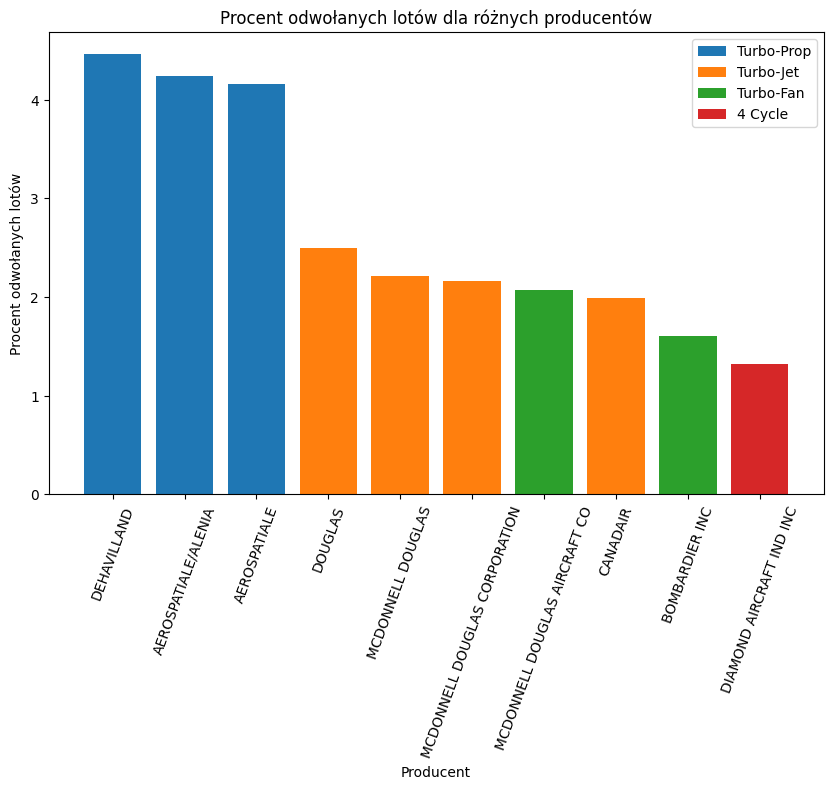

In [21]:
engine_colors = {}
unique_engine_types = list(df4.engine_type)
unique_engine_types = list(dict.fromkeys(unique_engine_types))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
for i, eng in enumerate(unique_engine_types):
    engine_colors[eng] = colors[i]

plt.figure(figsize=(10, 6))

# Rysowanie słupków
bars = []
for man, eng, ratio in zip(df4.manufacturer, df4.engine_type, df4.CancellationRatio):
    bar = plt.bar(man, ratio, color=engine_colors[eng])
    if eng not in bars:
        bars.append(eng)

# Tworzenie legendy
legend_handles = []
for bar in bars:
    legend_handles.append(plt.bar(0, 0, color=engine_colors[bar]))

plt.xlabel('Producent')
plt.ylabel('Procent odwołanych lotów')
plt.title('Procent odwołanych lotów dla różnych producentów')
plt.legend(legend_handles, unique_engine_types)
plt.xticks(rotation=70)

plt.show()